## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

## 讀入資料

In [2]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())
df_train.dropna(subset=["Age"],inplace=True)
df_train.sort_values(by="Age",ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S


# 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate

In [3]:
df_train["Survived_cate"]=df_train["Survived"].astype("object")
df_train.dtypes
df_train[["Age","Survived"]].isnull().any().sum()

0

###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


In [4]:
#Age資料:連續型  #Survived:離散型
aov = pg.anova(dv='Age', between='Survived', data=df_train, detailed=True)
aov.index=["組間變異","組內變異"]
aov

,Source,SS,DF,MS,F,p-unc,np2
組間變異,Survived,897.187582,1,897.187582,4.271195,0.039125,0.005963
組內變異,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [5]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.0059630974469252

In [6]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

'Negligible'

C:\Users\rober\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rober\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

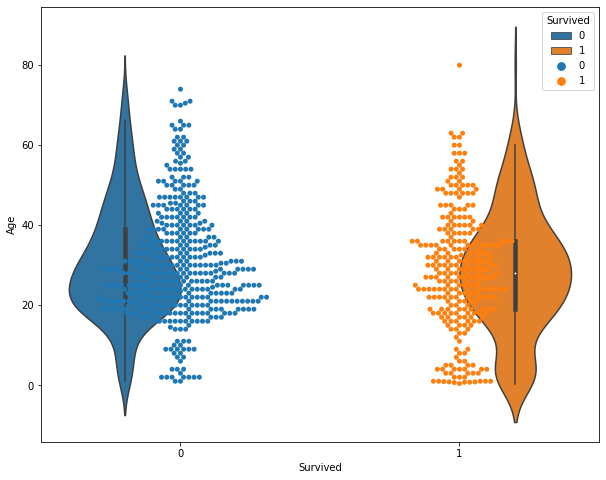

In [7]:
plt.figure(figsize=(10,8))
sns.violinplot("Survived","Age",hue="Survived",data=df_train)
sns.swarmplot("Survived","Age",hue="Survived",data=df_train)

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


In [8]:
contTable = pd.crosstab(df_train['Sex'], df_train['Survived'])
contTable

Survived,0,1
Sex,,
female,64,197
male,360,93


In [9]:
df = min(contTable.shape[0], contTable.shape[1]) - 1
df

1

In [10]:
crosstab, res = researchpy.crosstab(df_train['Sex'], df_train['Survived'], test='chi-square')
print(res)
print(crosstab)
print("Cramer's value is",res.loc[2,'results'])

                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   207.2978
1                    p-value =     0.0000
2               Cramer's phi =     0.5388
         Survived          
Survived        0    1  All
Sex                        
female         64  197  261
male          360   93  453
All           424  290  714
Cramer's value is 0.5388


In [11]:
## 寫一個副程式判斷相關性的強度
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df,res.loc[2,'results'])

'large'

<AxesSubplot:xlabel='Sex', ylabel='count'>

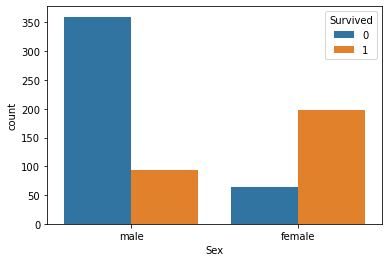

In [12]:
sns.countplot(x="Sex",hue="Survived",data=df_train)

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

In [13]:
df_train[["Age","Fare"]].isnull().sum()

Age     0
Fare    0
dtype: int64

0.0960666917690389


C:\Users\rober\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

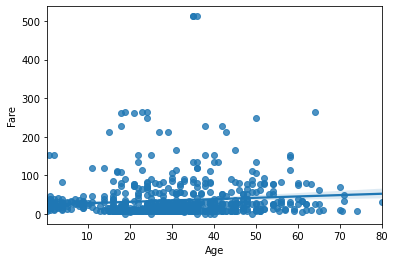

In [14]:
corr, _=stats.pearsonr(df_train['Age'], df_train['Fare'])
print(corr)
sns.regplot("Age","Fare",data=df_train)

In [15]:
df_train = pd.read_csv("Titanic_train.csv")
df_train[df_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


# 運用KNN進行補值

In [16]:
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
print(df_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [17]:
from sklearn.metrics.pairwise import nan_euclidean_distances
data=df_train[["Age","Fare"]]
display(pd.DataFrame(nan_euclidean_distances(data)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,66.001996,4.056553,47.657345,13.024592,1.708794,54.902415,24.313178,6.330878,24.182409,...,11.018941,3.266700,6.823672,3.006659,27.704072,7.619875,22.946950,22.910260,23.098972,10.012492
1,66.001996,0.000000,64.484682,18.429118,63.304425,88.847967,25.162819,61.780850,61.147547,47.691405,...,63.584394,62.837725,61.600402,65.535615,42.170158,59.312250,45.445691,67.646502,42.991986,63.815987
2,4.056553,64.484682,0.000000,46.062790,9.000868,0.754200,52.100901,27.366448,3.360534,25.188022,...,7.000061,4.766226,3.260464,1.328768,24.868454,5.172584,23.158273,21.955666,22.075000,6.002552
3,47.657345,18.429118,46.062790,0.000000,45.050000,63.132898,19.040258,45.984787,42.722405,31.166393,...,45.248422,44.523448,43.171287,47.123269,24.306391,40.890219,28.100000,41.931432,24.791329,45.449120
4,13.024592,63.304425,9.000868,45.050000,0.000000,0.577423,47.754949,35.477466,8.573607,30.428862,...,2.005936,13.231954,7.416367,10.049876,21.451238,9.407577,27.162520,21.778889,23.723459,3.014963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,7.619875,59.312250,5.172584,40.890219,9.407577,6.422934,47.321178,26.271765,1.866700,21.457218,...,7.877364,5.582721,2.692582,6.277141,20.100140,0.000000,18.788294,14.778532,17.029386,7.250000
887,22.946950,45.445691,23.158273,28.100000,27.162520,30.464564,41.267044,19.200407,20.492739,5.000501,...,26.164779,19.712914,21.476732,23.721351,20.019131,18.788294,0.000000,9.263099,7.000000,25.769410
888,22.910260,67.646502,21.955666,41.931432,21.778889,21.201465,40.181343,3.358757,17.418444,9.363225,...,21.996961,18.290448,18.314066,23.193102,8.025662,14.778532,9.263099,0.000000,9.263099,22.203153
889,23.098972,42.991986,22.075000,24.791329,23.723459,30.464564,35.524202,25.605773,18.893183,12.000209,...,23.186109,19.889670,19.602296,22.971776,13.029414,17.029386,7.000000,9.263099,0.000000,23.044793


In [18]:
# KNN
value_neighbors=1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors,weights='distance',add_indicator=True)
df_filled = pd.DataFrame(imputer.fit_transform(data))
df_filled.rename({0:"Age",1:"Fare"},inplace=True,axis="columns")
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled[df_filled[2]==1])

,Age,Fare,2
5,21.0,8.4583,1.0
17,34.0,13.0000,1.0
19,45.5,7.2250,1.0
26,45.5,7.2250,1.0
28,19.0,7.8792,1.0
...,...,...,...
859,28.5,7.2292,1.0
863,24.0,69.5500,1.0
868,29.0,9.5000,1.0
878,28.0,7.8958,1.0


0.06007838741871235
幾乎零相關


C:\Users\rober\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Fare'>

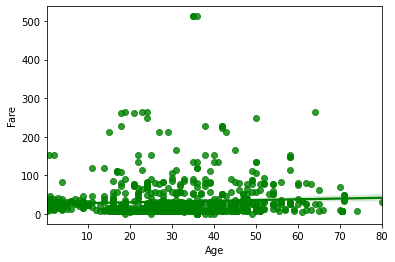

In [20]:
corr, _=stats.pearsonr(df_filled['Age'], df_filled['Fare'])
print(corr)
print("幾乎零相關")
sns.regplot("Age","Fare",data=df_filled,color="g")